# EDA Experiments Grese

## Requirements

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

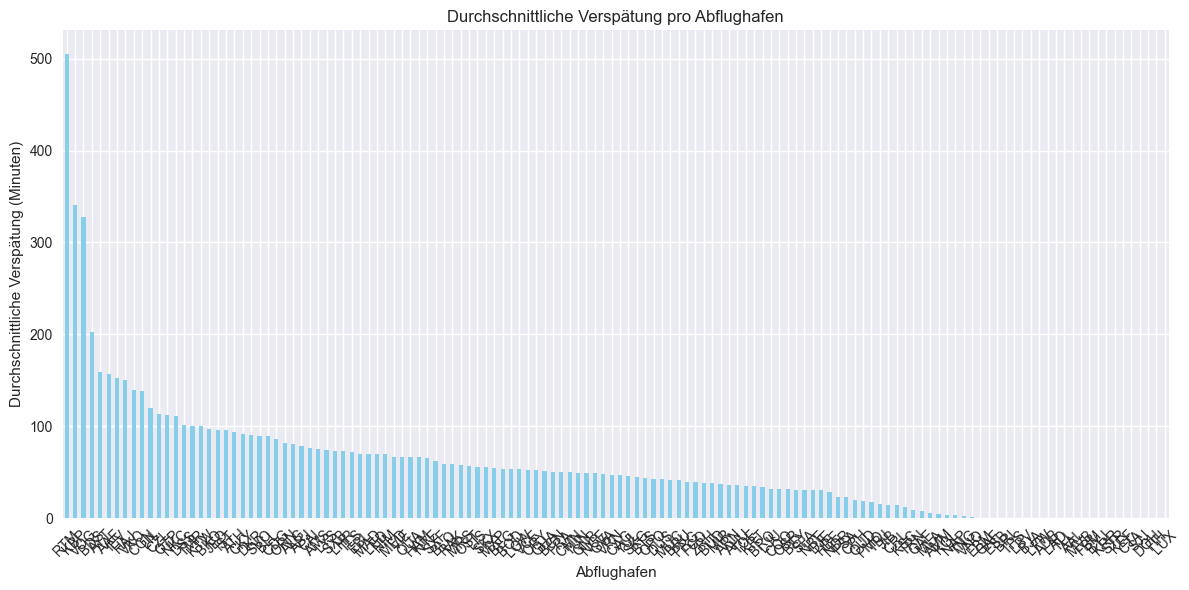

In [ ]:
# die Verteilung der Verspätungen unter Abluegen und Ankuenften
# Durchschnittliche Verspätung pro Abflughafen
dep_delay = df.groupby("DEPSTN")["target"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
dep_delay.plot(kind="bar", color="skyblue")
plt.title("Durchschnittliche Verspätung pro Abflughafen")
plt.xlabel("Abflughafen")
plt.ylabel("Durchschnittliche Verspätung (Minuten)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"./img/dep-to-avg-delay_hist.png", dpi=DPI, bbox_inches="tight")
plt.show()

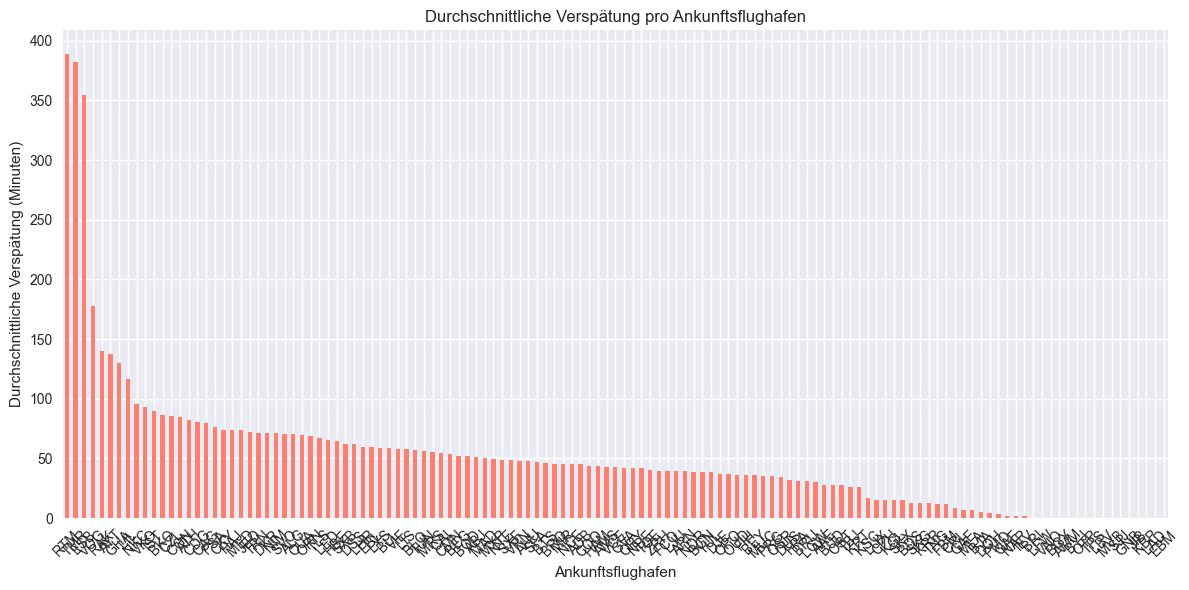

In [ ]:
# Durchschnittliche Verspätung pro Ankunftsflughafen
arr_delay = df.groupby("ARRSTN")["target"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
arr_delay.plot(kind="bar", color="salmon")
plt.title("Durchschnittliche Verspätung pro Ankunftsflughafen")
plt.xlabel("Ankunftsflughafen")
plt.ylabel("Durchschnittliche Verspätung (Minuten)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"./img/dest-to-avg-delay_hist.png", dpi=DPI, bbox_inches="tight")
plt.show()

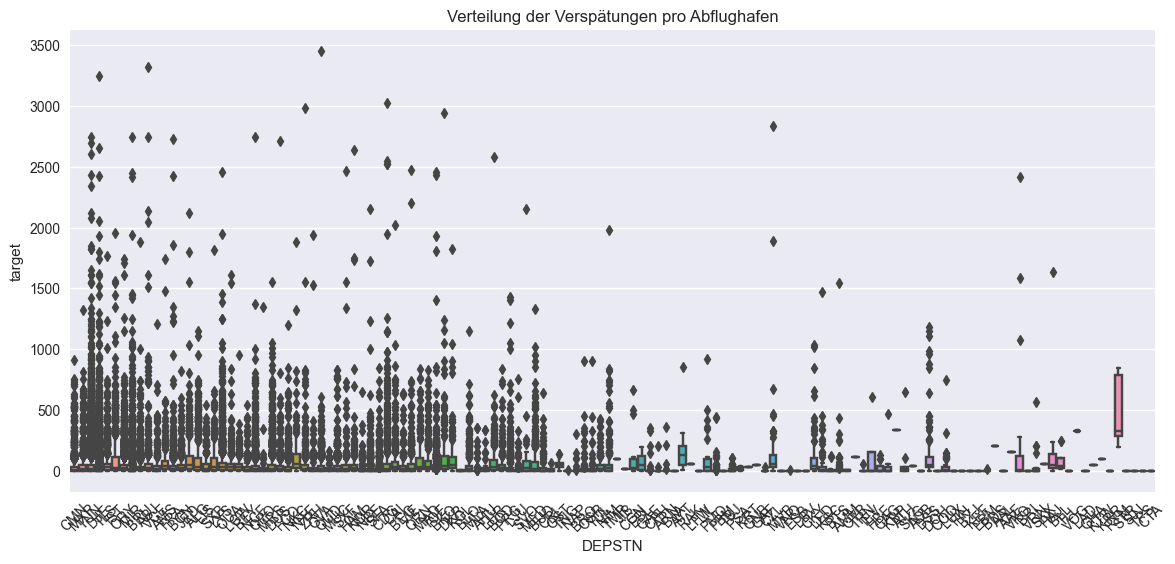

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="DEPSTN", y="target", data=df)
plt.title("Verteilung der Verspätungen pro Abflughafen")
plt.xticks(rotation=45)
plt.savefig(f"./img/airport-to-delay_boxplot.png", dpi=DPI, bbox_inches="tight")
plt.show()

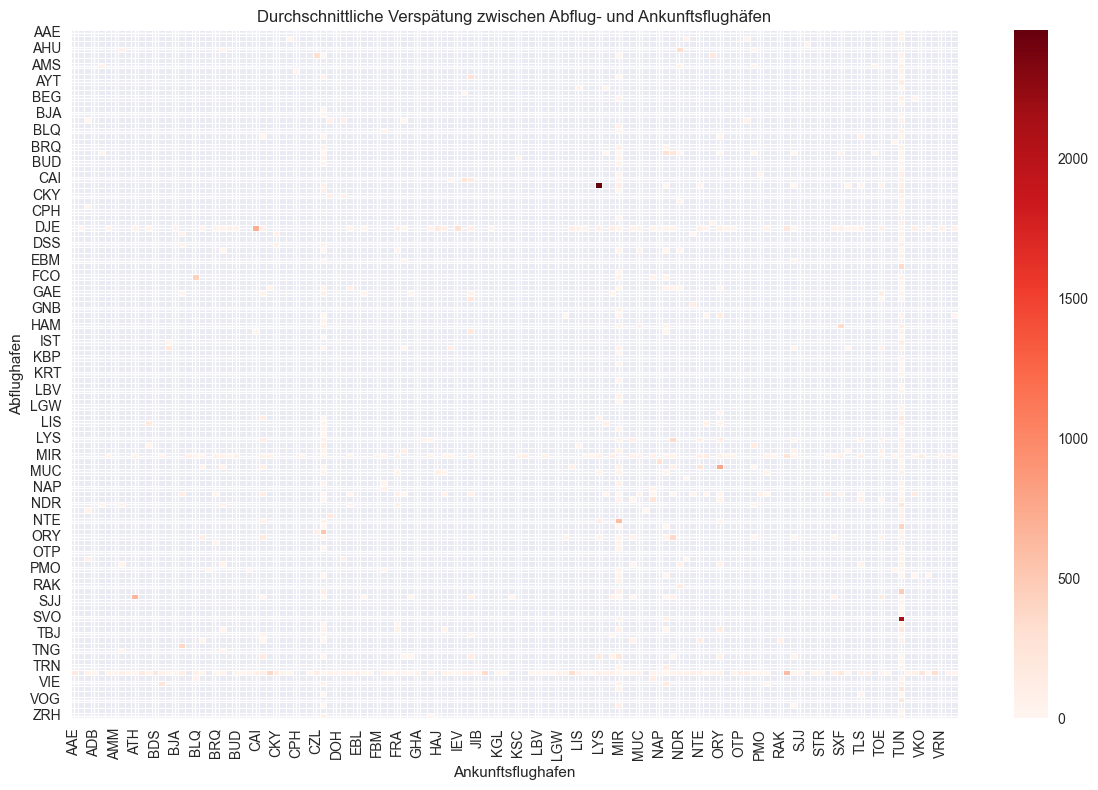

In [ ]:
# Pivot-Tabelle für Heatmap
route_delay = df.pivot_table(
    index="ARRSTN", columns="DEPSTN", values="target", aggfunc="mean"
)

plt.figure(figsize=(12, 8))
sns.heatmap(route_delay, cmap="Reds", linewidths=0.5, annot=False)
plt.title("Durchschnittliche Verspätung zwischen Abflug- und Ankunftsflughäfen")
plt.xlabel("Ankunftsflughafen")
plt.ylabel("Abflughafen")
plt.tight_layout()
plt.savefig(f"./img/dep-vs-dest-wrt-avg-delay_heatmap.png", dpi=DPI, bbox_inches="tight")
plt.show()

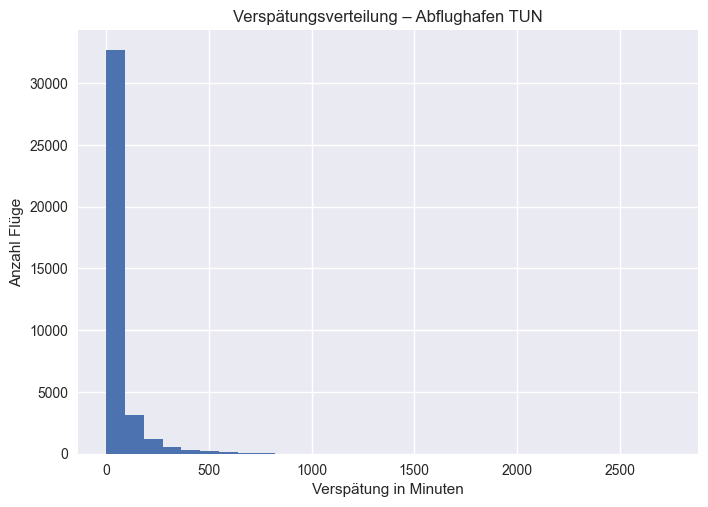

In [ ]:
df[df["DEPSTN"] == "TUN"]["target"].hist(bins=30)
plt.title("Verspätungsverteilung – Abflughafen TUN")
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Anzahl Flüge")
plt.savefig(f"./img/airport-to-delay-on-dest-eq-TUN_boxplot.png", dpi=DPI, bbox_inches="tight")
plt.show()

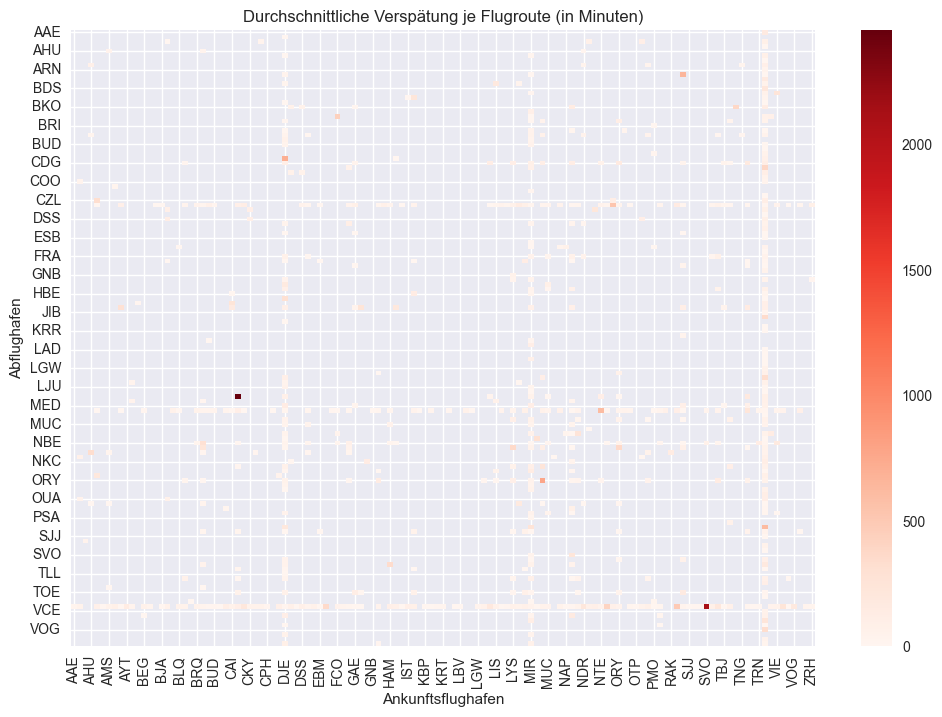

In [ ]:
pivot = df.pivot_table(
    index="DEPSTN", columns="ARRSTN", values="target", aggfunc="mean"
)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=False, cmap="Reds")
plt.title("Durchschnittliche Verspätung je Flugroute (in Minuten)")
plt.xlabel("Ankunftsflughafen")
plt.ylabel("Abflughafen")
plt.savefig(f"./img/dep-vs-dest-wrt-delay_heatmap.png", dpi=DPI, bbox_inches="tight")
plt.show()

In [ ]:
top_dep = df["DEPSTN"].value_counts().head(10)
avg_delay_dep = df.groupby("DEPSTN")["target"].mean().loc[top_dep.index]

summary = pd.DataFrame({"Fluganzahl": top_dep, "Ø Verspätung (Min.)": avg_delay_dep})
print(summary)

     Fluganzahl  Ø Verspätung (Min.)
TUN       38194            49.387495
DJE        9710            29.998970
ORY        6702            51.801701
MIR        4937            36.704882
MRS        2826            57.694268
LYS        2333            73.929276
NCE        2215            48.892099
ALG        1564            80.601662
MXP        1525            54.662951
MUC        1486            41.857335
